**Прогнозирование призерства на заключительном этапе Всероссийской олимпиады школьников по баллам, набранным на региональном этапе**

**Цель:** написать программу, определяющую вероятность призерства на заключительном этапе Всероссийской олимпиады школьников по русскому языку на основе баллов, набранных на региональном этапе.

Задачи.
1. На основе данных сети Интернет подготовить датасет с данными о баллах на региональном этапе олимпиады и датасет с данными о призерах заключительного этапа олимпиады.
2. Составить сводный датафрейм, включающий следующую информацию: 
1) призеры заключительного этапа и их баллы на региональном этапе; 
2) участники заключительного этапа и их баллы на региональном этапе; 
3) рандомно выбранные участники регионального этапа, не прошедшие на всероссийский, и информация об их баллах.
3. Выполнить предобработку датафрейма.
4. Построить модель на основе логистической регрессии.
5. Построить с помощью модели график зависимости вероятности призерства на заключительном этапе от количества баллов на региональном этапе.

**Подготовка датафрейма**

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
import pandas as pd
import re

In [ ]:
# Данные о баллах на региональном этапе олимпиады.
region_dataframe = pd.read_csv("Region_dataframe.csv", encoding = "windows-1251", sep = ';') 
region_dataframe = region_dataframe.fillna('-')
region_dataframe

,Фамилия,Имя,Класс,Регион,Балл
0,Челышкова Алина,-,9,Адыгея,"27,8"
1,Долева Алина,-,9,Адыгея,"8,5"
2,Порубова Александра,-,9,Адыгея,"5,7"
3,Яшникова София,-,9,Адыгея,"5,1"
4,Вартазарян Эрик,-,9,Адыгея,"4,5"
...,...,...,...,...,...
11516,Таганов Д.А.,-,11,Ярославская область,"4,9"
11517,Агаева А.А.,-,11,Ярославская область,4
11518,Одинцова А.Ю.,-,11,Ярославская область,4
11519,Наумова К.А.,-,11,Ярославская область,"2,7"


In [ ]:
# Данные о призерстве на заключительном этапе
country_dataframe = pd.read_csv("Country_dataframe.csv", encoding = "windows-1251", sep = ';') 
country_dataframe

,ФИО,Имя,Класс,Регион,Балл,Статус
0,Хоретоненко Елизавета Павловна,NaN,9,Москва,"82,8",Призер
1,Головин Матвей Олегович,NaN,9,Москва,"80,4",Призер
2,Овечкина Анна Артемовна,NaN,9,Вологодская область,"78,8",Призер
3,Антонова Карина Евгеньевна,NaN,9,Республика\nТатарстан,"77,6",Призер
4,Антропова Марина Дмитриевна,NaN,9,Санкт-Петербург,"75,6",Призер
...,...,...,...,...,...,...
295,Асадова Аян Мурад кызы,NaN,11,Москва,"16,1",участник
296,Оруджев Тимур Ильхамович,NaN,11,Москва,"14,5",участник
297,Фоменко Дарья Викторовна,NaN,11,Москва,"14,2",участник
298,Кулыгина Анна Владимировна,NaN,11,Москва,"7,9",участник


In [ ]:
country_dataframe.shape

(300, 6)

In [ ]:
# Унификация формата представления данных в датафреймах.
for i in region_dataframe.index:
    if region_dataframe.loc[i][1] == '-':
      text = region_dataframe.loc[i][0]
      family = text.split()
      region_dataframe.loc[i][0] = family[0]
      if len(family)!= 1:
        region_dataframe.loc[i][1] = family[1][0]+'.'
for i in country_dataframe.index:
  text = country_dataframe.iloc[i][0]
  family = text.split()
  country_dataframe.iloc[i, 0] = family[0]
  country_dataframe.iloc[i, 1] = family[1][0]+'.'
  

In [ ]:
region_dataframe.assign(status = 'не прошел')

,Фамилия,Имя,Класс,Регион,Балл,status
0,Челышкова,А.,9,Адыгея,"27,8",не прошел
1,Долева,А.,9,Адыгея,"8,5",не прошел
2,Порубова,А.,9,Адыгея,"5,7",не прошел
3,Яшникова,С.,9,Адыгея,"5,1",не прошел
4,Вартазарян,Э.,9,Адыгея,"4,5",не прошел
...,...,...,...,...,...,...
11516,Таганов,Д.,11,Ярославская область,"4,9",не прошел
11517,Агаева,А.,11,Ярославская область,4,не прошел
11518,Одинцова,А.,11,Ярославская область,4,не прошел
11519,Наумова,К.,11,Ярославская область,"2,7",не прошел


In [ ]:
country_dataframe

,ФИО,Имя,Класс,Регион,Балл,Статус
0,Хоретоненко,Е.,9,Москва,"82,8",Призер
1,Головин,М.,9,Москва,"80,4",Призер
2,Овечкина,А.,9,Вологодская область,"78,8",Призер
3,Антонова,К.,9,Республика\nТатарстан,"77,6",Призер
4,Антропова,М.,9,Санкт-Петербург,"75,6",Призер
...,...,...,...,...,...,...
295,Асадова,А.,11,Москва,"16,1",участник
296,Оруджев,Т.,11,Москва,"14,5",участник
297,Фоменко,Д.,11,Москва,"14,2",участник
298,Кулыгина,А.,11,Москва,"7,9",участник


In [ ]:
# Построение сводного датафрейма с информацией о призерах и участниках заключительного этапа, а также их баллах на региональном этапе.
summary_dict = {'family_name': [], 'class': [], 'region': [], 'mark_region': [],'status':[]}
summary_dataframe = pd.DataFrame.from_dict(summary_dict, orient = 'columns')
summary_dataframe['family_name'] = country_dataframe['ФИО']
summary_dataframe['class'] = country_dataframe['Класс']
summary_dataframe['region'] = country_dataframe['Регион']
summary_dataframe['status'] = country_dataframe['Статус']

In [ ]:
for i in summary_dataframe.index:
  a=region_dataframe.loc[(region_dataframe['Фамилия'] == summary_dataframe.iloc[i,0])
  &(region_dataframe['Класс'] == str(summary_dataframe.iloc[i,1]))
  & (region_dataframe['Регион'] == summary_dataframe.iloc[i,2])]
  if a.empty == False:
    mark=list(a['Балл'])[0]
    mark=re.sub(',', '.', mark)
    summary_dataframe.loc[i,'mark_region']=float(mark)
  region_dataframe = region_dataframe.drop(a.index, axis = 0)


In [ ]:
region_dataframe = region_dataframe.drop('Имя', axis = 1)

In [ ]:
# Добавление в сводный датафрейм информации об участниках регионального этапа, не прошедших на заключительный.
region_dataframe_sample = region_dataframe.sample(n=150)
for i in region_dataframe_sample.index:
  region_dataframe_sample.at[i, 'Балл'] = re.sub(',', '.', region_dataframe_sample.at[i, 'Балл'])
  region_dataframe_sample=region_dataframe_sample.assign(status = 'не прошел')
region_dataframe_sample.rename(columns = {'Фамилия' : 'family_name', 'Класс':'class', 'Балл':'mark_region', 'Регион':'region'}, inplace = True)

In [ ]:
summary_dataframe = summary_dataframe.append(region_dataframe_sample)

In [ ]:
summary_dataframe = summary_dataframe.dropna(axis = 0)

In [ ]:
summary_dataframe

,family_name,class,region,mark_region,status
0,Хоретоненко,9,Москва,81.25,Призер
1,Головин,9,Москва,86.93,Призер
2,Овечкина,9,Вологодская область,60.2,Призер
4,Антропова,9,Санкт-Петербург,47.2,Призер
5,Бахметьева,9,Московская область,50.0,Призер
...,...,...,...,...,...
3625,Трошкова,9,Москва,12.5,не прошел
1929,Козлова,11,Москва,6.25,не прошел
5180,Супроткин,10,Московская область,6.5,не прошел
10055,Елец,9,Новгородская область,2.27,не прошел


In [ ]:
summary_dataframe.to_csv('summary_dataframe')
summary_dataframe

,family_name,class,region,mark_region,status
0,Хоретоненко,9,Москва,81.25,Призер
1,Головин,9,Москва,86.93,Призер
2,Овечкина,9,Вологодская область,60.2,Призер
4,Антропова,9,Санкт-Петербург,47.2,Призер
5,Бахметьева,9,Московская область,50.0,Призер
...,...,...,...,...,...
3625,Трошкова,9,Москва,12.5,не прошел
1929,Козлова,11,Москва,6.25,не прошел
5180,Супроткин,10,Московская область,6.5,не прошел
10055,Елец,9,Новгородская область,2.27,не прошел


**Предобработка сводного датафрейма**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
files.upload()

In [ ]:
data = pd.read_csv('summary_dataframe')

In [ ]:
data.drop(['Unnamed: 0', 'class', 'family_name'], axis =1, inplace=True) 
data["status"]=data["status"].map({'Призер':1,'участник':0,'не прошел': 0}) 

In [ ]:
data=data.dropna()

In [ ]:
data

,region,mark_region,status
0,Москва,81.25,1.0
1,Москва,86.93,1.0
2,Вологодская область,60.20,1.0
3,Санкт-Петербург,47.20,1.0
4,Московская область,50.00,1.0
...,...,...,...
401,Москва,12.50,0.0
402,Москва,6.25,0.0
403,Московская область,6.50,0.0
404,Новгородская область,2.27,0.0


In [ ]:
b = data.loc[data['mark_region'] == '-']
data = data.drop(b.index, axis = 0)

In [ ]:
data.shape

(405, 3)

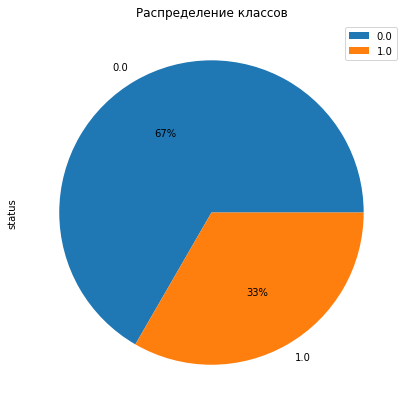

In [ ]:
classes = pd.value_counts(data["status"])

classes.plot(kind='pie',figsize=(7,7),autopct='%0.f%%', legend=True, title ="Распределение классов") 

plt.show()

In [ ]:
x = data.mark_region.values.reshape(-1,1)

In [ ]:
# разделение на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, data['status'], test_size=0.3, random_state=25)          

In [ ]:
# нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Логистическая регрессия

In [ ]:
model = LogisticRegression(class_weight={0: 0.33,1: 0.67})

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.33, 1: 0.67})

In [ ]:
train_preds = model.predict_proba(X_train)[:,1]

test_preds = model.predict_proba(X_test)[:, 1] 

In [ ]:
pd.DataFrame(model.predict_proba(X_train))

,0,1
0,0.507223,0.492777
1,0.669284,0.330716
2,0.795384,0.204616
3,0.520326,0.479674
4,0.890637,0.109363
...,...,...
278,0.877007,0.122993
279,0.848753,0.151247
280,0.277671,0.722329
281,0.910274,0.089726


In [ ]:
print('result on test: {}'.format(roc_auc_score(y_test, test_preds)))

result on test: 0.7453165374677002


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


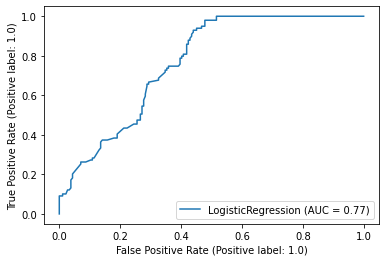

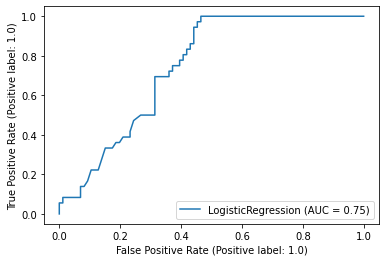

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_train, y_train)

plot_roc_curve(model,X_test, y_test)

In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.59      0.70        86
         1.0       0.44      0.78      0.57        36

    accuracy                           0.65       122
   macro avg       0.65      0.69      0.63       122
weighted avg       0.74      0.65      0.66       122



Предсказание

In [ ]:
data = [list(range(101))]
columns=['mark']
# data = list(range(86))
df = pd.DataFrame(data, columns)

In [ ]:
df_T = df.T

In [ ]:
x_df = df.values.reshape(-1,1)

In [ ]:
scaler = StandardScaler()
x_df_s = scaler.fit_transform(x_df)

In [ ]:
forecast = pd.DataFrame(model.predict_proba(x_df_s))

In [ ]:
x_plt = forecast.index.tolist()

In [ ]:
y_plt = forecast[1].tolist()

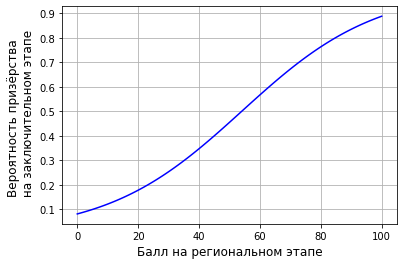

In [ ]:
plt.plot(x_plt, y_plt, 'b')
plt.xlabel('Балл на региональном этапе', fontsize = 12)
plt.ylabel('Вероятность призёрства \n на заключительном этапе', fontsize = 12)
plt.grid()
plt.show()